In [84]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [85]:
FIG_SIZE = (15, 10)
FILE = "blues.00000.wav"
sample_rate = 22050

signal, sample_rate = librosa.load(FILE, sr=sample_rate)

C:\Users\Yash\AppData\Local\Temp/ipykernel_2372/2242891595.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sample_rate, alpha=0.4)


Text(0.5, 1.0, 'Waveform')

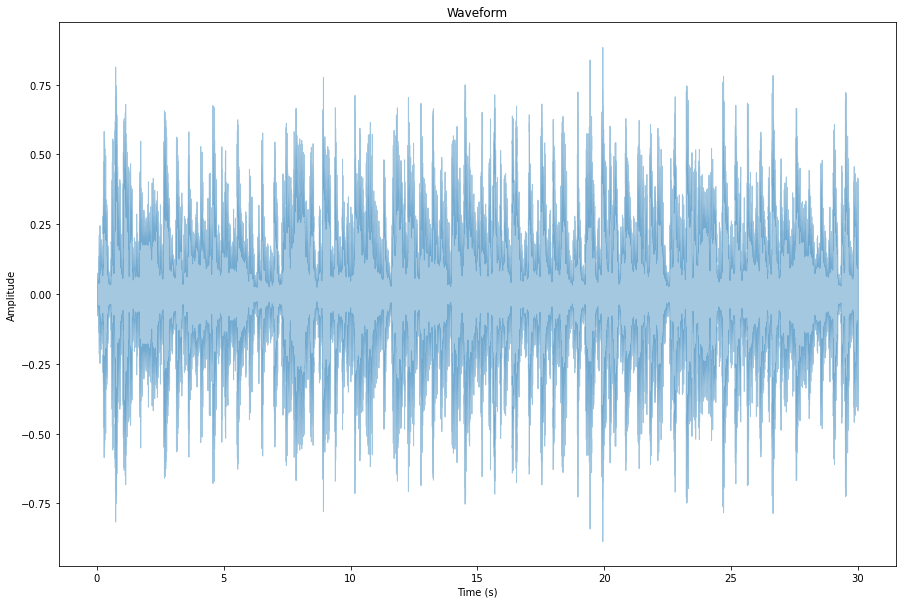

In [86]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [87]:
fft = np.fft.fft(signal)
type(fft), fft.shape

(numpy.ndarray, (661794,))

In [88]:
spectrum = np.abs(fft)
spectrum.shape

(661794,)

In [89]:
f = np.linspace(0, sample_rate, len(spectrum))
f

array([0.00000000e+00, 3.33185754e-02, 6.66371509e-02, ...,
       2.20499334e+04, 2.20499667e+04, 2.20500000e+04])

In [90]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
print(left_spectrum.shape, left_f.shape)

(330897,) (330897,)


Text(0.5, 1.0, 'Power Spectrum')

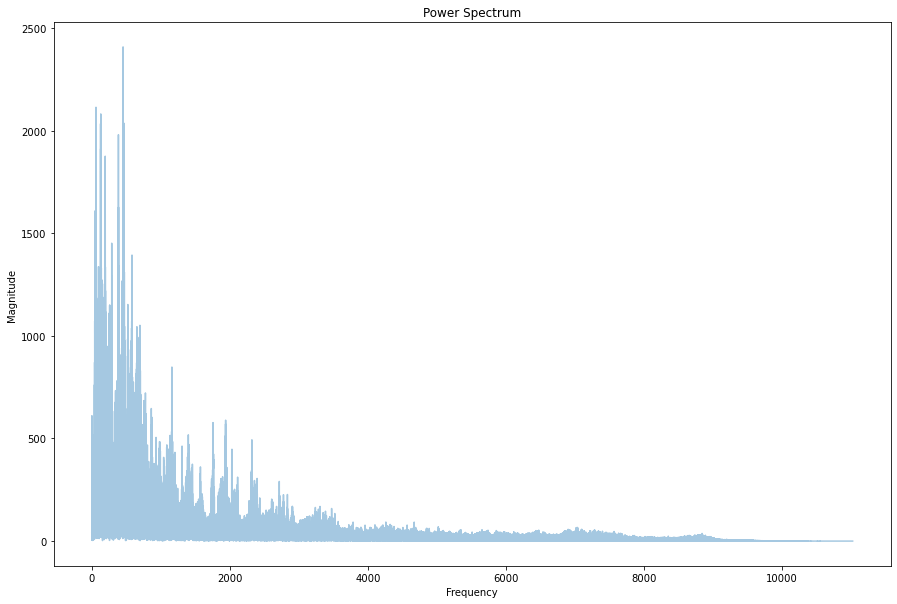

In [91]:
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [92]:
hop_length = 512
n_fft = 2048

In [93]:
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [94]:
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

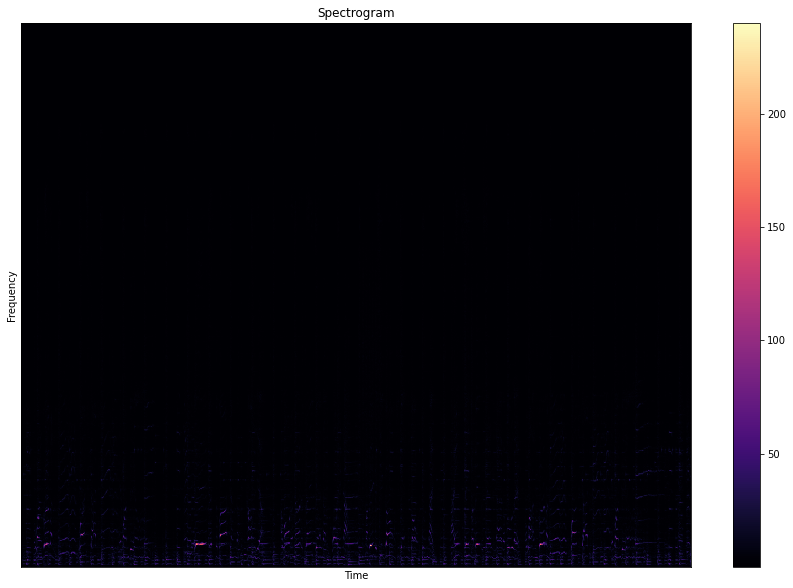

In [95]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [96]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (db)')

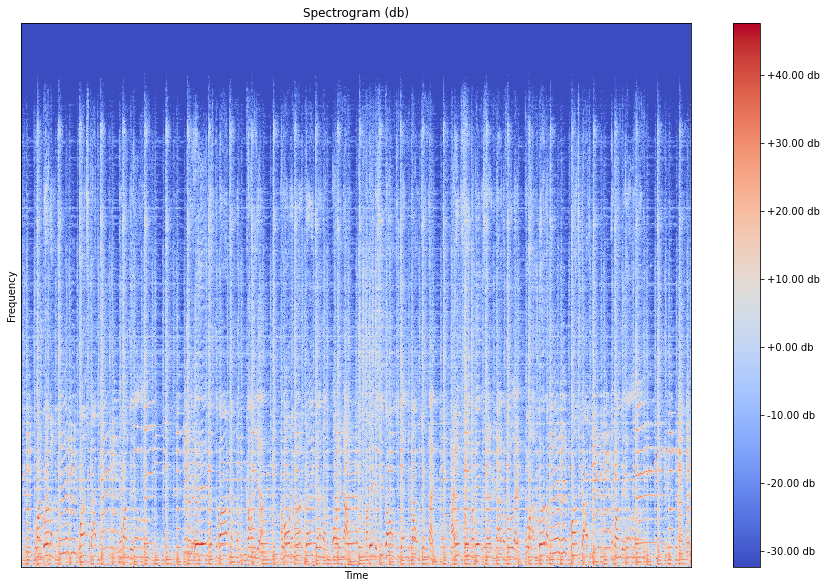

In [97]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+0.2f db")
plt.title("Spectrogram (db)")

In [98]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

C:\Users\Yash\AppData\Local\Temp/ipykernel_2372/4040816858.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


In [99]:
type(MFCCs), MFCCs.shape

(numpy.ndarray, (13, 1293))

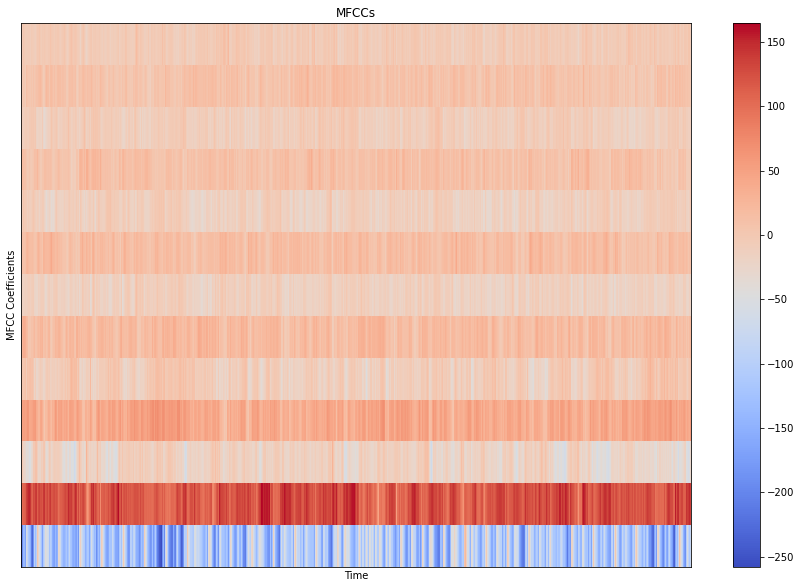

In [100]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()